In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers = pd.read_csv('yahoo_tickers.csv')['Ticker'].tolist()
tickers.remove('RDSA.L')
tickers.remove('KL.TO')
tickers.remove('ZGNX')
tickers.remove('GNDI3.SA')
tickers.remove('HNP')
tickers.remove('JRJC')

def download_data_and_calc_returns(tickers, period='5y', interval='1d', prepost=False):
    data = yf.download(tickers, period=period, interval=interval, prepost=prepost, threads=True)
    data = data.loc[:,('Adj Close', slice(None))]  # get adjusted close only
    data.columns = tickers
    data = data[tickers].pct_change().dropna()
    return data

returns = download_data_and_calc_returns(tickers)

[*********************100%***********************]  446 of 446 completed


In [3]:
returns.head()

,ABT,ABBV,ANF,ACHC,ATVI,ADBE,AMD,AMTX,AFL,AC.TO,...,WEGE3.SA,WFC,WTB.L,WSM,000858.SZ,WH,WYN.L,XRX,YUM,ZTO
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-29,0.007587,0.023053,0.013655,0.002135,-0.004383,0.018657,0.030965,0.005573,-0.003188,-0.012403,...,-0.001704,-0.012066,-0.022000,-0.033090,0.014283,0.003671,0.021499,0.011397,-0.002021,-0.015380
2021-04-30,0.010039,-0.039075,-0.015544,-0.000237,-0.012893,-0.001221,-0.008834,-0.013460,-0.009595,-0.034537,...,-0.028449,-0.009466,0.002045,0.022667,-0.028843,-0.019098,0.015736,0.005130,-0.022280,0.004686
2021-05-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001783,0.002408,0.019376,-0.011382,...,0.026940,0.000000,0.000000,0.072577,0.027603,-0.001657,-0.004648,0.003849,0.002072,0.006841
2021-05-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.013447,0.028571,-0.004003,0.001056,-0.008224,...,-0.018249,-0.010789,-0.071429,0.079011,0.006290,-0.010788,-0.030934,-0.005084,-0.008269,-0.007721
2021-05-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.015682,-0.019097,-0.018489,-0.003165,0.016584,...,0.019576,0.006544,0.010989,-0.034172,0.030073,0.001258,-0.019073,0.014409,0.001787,0.002801


In [4]:
port = rp.Portfolio(returns=returns, lowerret=(pow(1.5, 0.2) - 1)/252)  # daily return NOT annual
port.assets_stats()
risk_measure = 'SLPM'
objective = 'MinRisk'
risk_free_rate = 0.04/252
allocations = port.optimization(rm=risk_measure, obj=objective, rf=risk_free_rate)

You must convert self.cov to a positive definite matrix


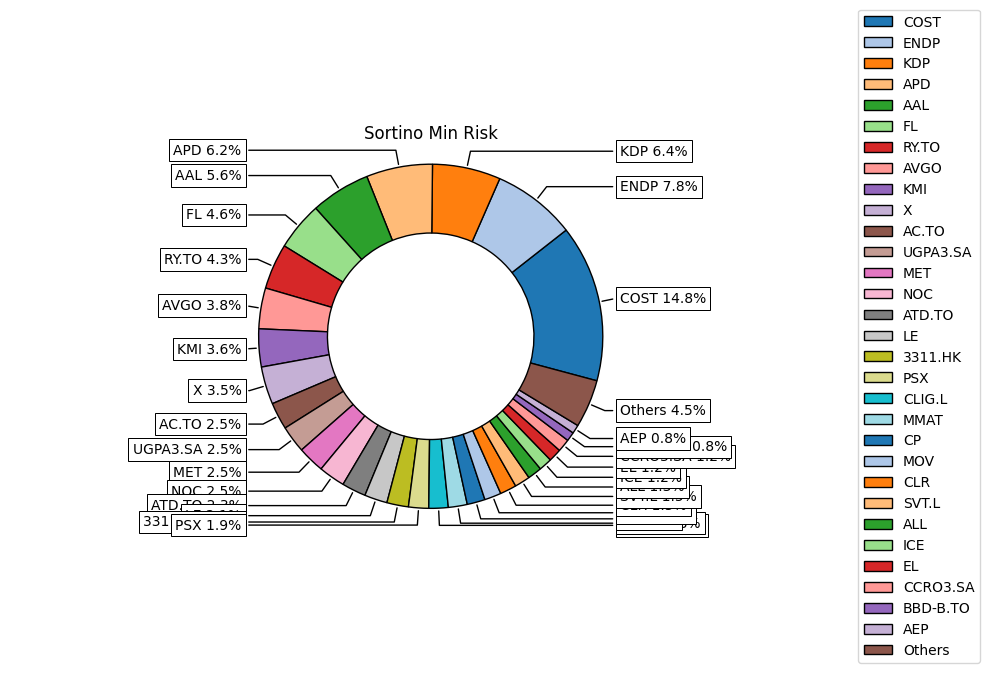

In [5]:
ax = rp.plot_pie(w=allocations, title='Sortino Min Risk', others=0.05, nrow=len(port.assetslist), cmap = "tab20", height=6, width=10, ax=None)

In [6]:
frontier = port.efficient_frontier(rm=risk_measure, points=50, rf=risk_free_rate)
display(frontier.T.head())

,ABT,ABBV,ANF,ACHC,ATVI,ADBE,AMD,AMTX,AFL,AC.TO,...,WEGE3.SA,WFC,WTB.L,WSM,000858.SZ,WH,WYN.L,XRX,YUM,ZTO
0,8.382049e-12,7.466581e-12,5.958983e-12,1.143048e-11,3.437205e-11,2.516337e-11,2.994763e-12,3.512030e-12,4.558151e-12,2.542715e-02,...,2.893996e-12,2.543959e-12,3.167007e-12,1.843387e-12,8.144069e-12,2.135166e-12,7.736813e-12,5.111316e-12,6.376735e-12,8.060371e-12
1,2.184838e-08,2.742772e-08,5.491393e-08,5.031080e-08,1.021362e-07,1.465474e-08,3.064588e-07,1.350791e-07,4.230313e-08,1.207685e-07,...,2.665536e-07,5.628394e-08,3.213718e-02,7.444233e-08,7.168916e-10,2.866528e-07,6.141760e-08,8.280490e-08,1.684431e-07,3.372771e-07
2,4.098208e-08,9.879091e-09,4.891235e-08,3.851069e-08,1.256778e-07,7.441051e-08,1.019957e-07,1.327561e-07,5.025743e-08,1.059351e-07,...,3.597379e-08,1.889111e-09,3.748632e-02,3.236434e-08,4.268781e-08,1.696762e-07,6.278419e-09,4.460780e-08,5.884479e-08,1.167577e-07
3,6.523604e-08,2.506184e-08,4.823292e-08,8.464727e-09,2.566831e-08,1.586295e-08,3.336272e-08,1.081123e-07,1.726563e-08,2.186159e-09,...,7.868908e-08,3.441827e-08,4.641919e-02,9.128103e-08,8.374220e-09,1.011048e-07,5.337478e-08,4.298261e-08,1.321115e-08,1.614135e-07
4,1.763875e-10,2.157967e-10,1.343748e-10,2.760108e-10,2.278519e-10,4.791810e-10,7.415299e-11,7.725611e-11,1.570048e-10,2.997922e-10,...,6.119097e-11,6.253612e-11,5.279699e-02,4.189626e-11,1.089709e-10,3.565813e-11,1.788799e-10,1.020740e-10,9.670930e-11,8.413686e-11


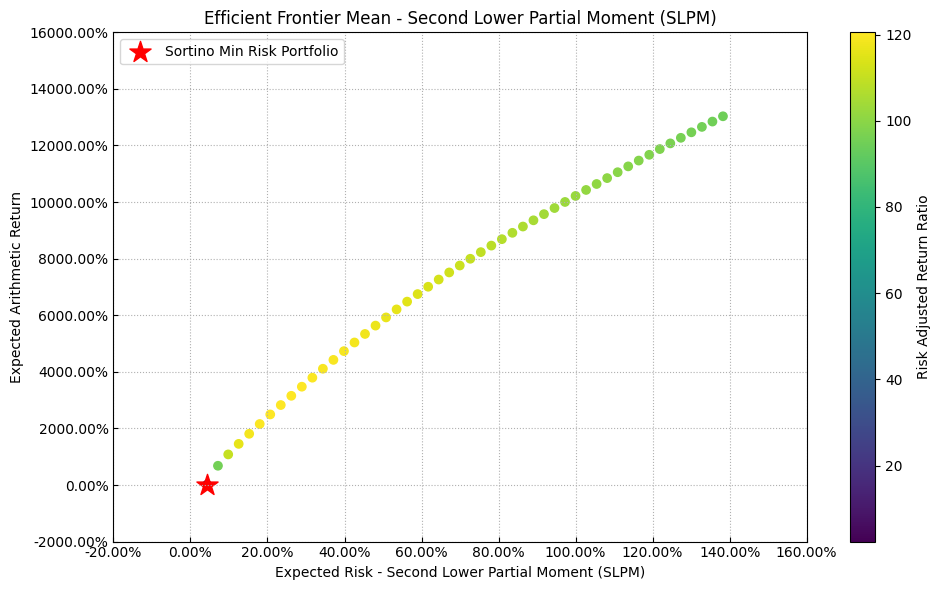

In [7]:
# Plotting the efficient frontier
label = 'Sortino Min Risk Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=risk_measure, alpha=0.05, cmap='viridis', rf=risk_free_rate, w=allocations, label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

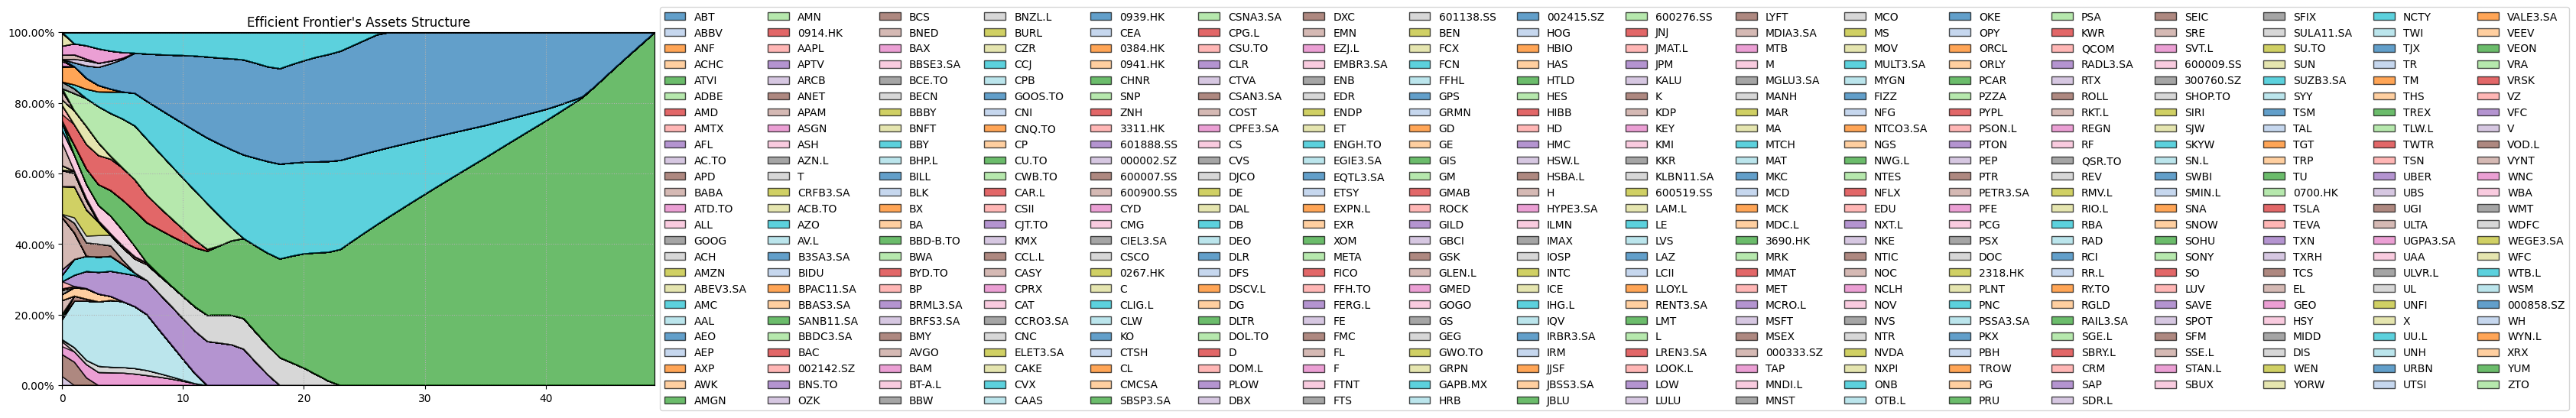

In [8]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

array([<AxesSubplot: title={'center': 'Copyright (c) 2020-2022, Dany Cajas. All rights reserved.'}>,
       <AxesSubplot: title={'center': 'Historical Compounded Cumulative Returns'}>,
       <AxesSubplot: title={'center': 'Portfolio Composition'}>,
       <AxesSubplot: title={'center': 'Risk (Second Lower Partial Moment) Contribution per Asset'}>,
       <AxesSubplot: title={'center': 'Portfolio Returns Histogram'}, ylabel='Probability Density'>,
       <AxesSubplot: title={'center': 'Historical Uncompounded Drawdown'}>],
      dtype=object)

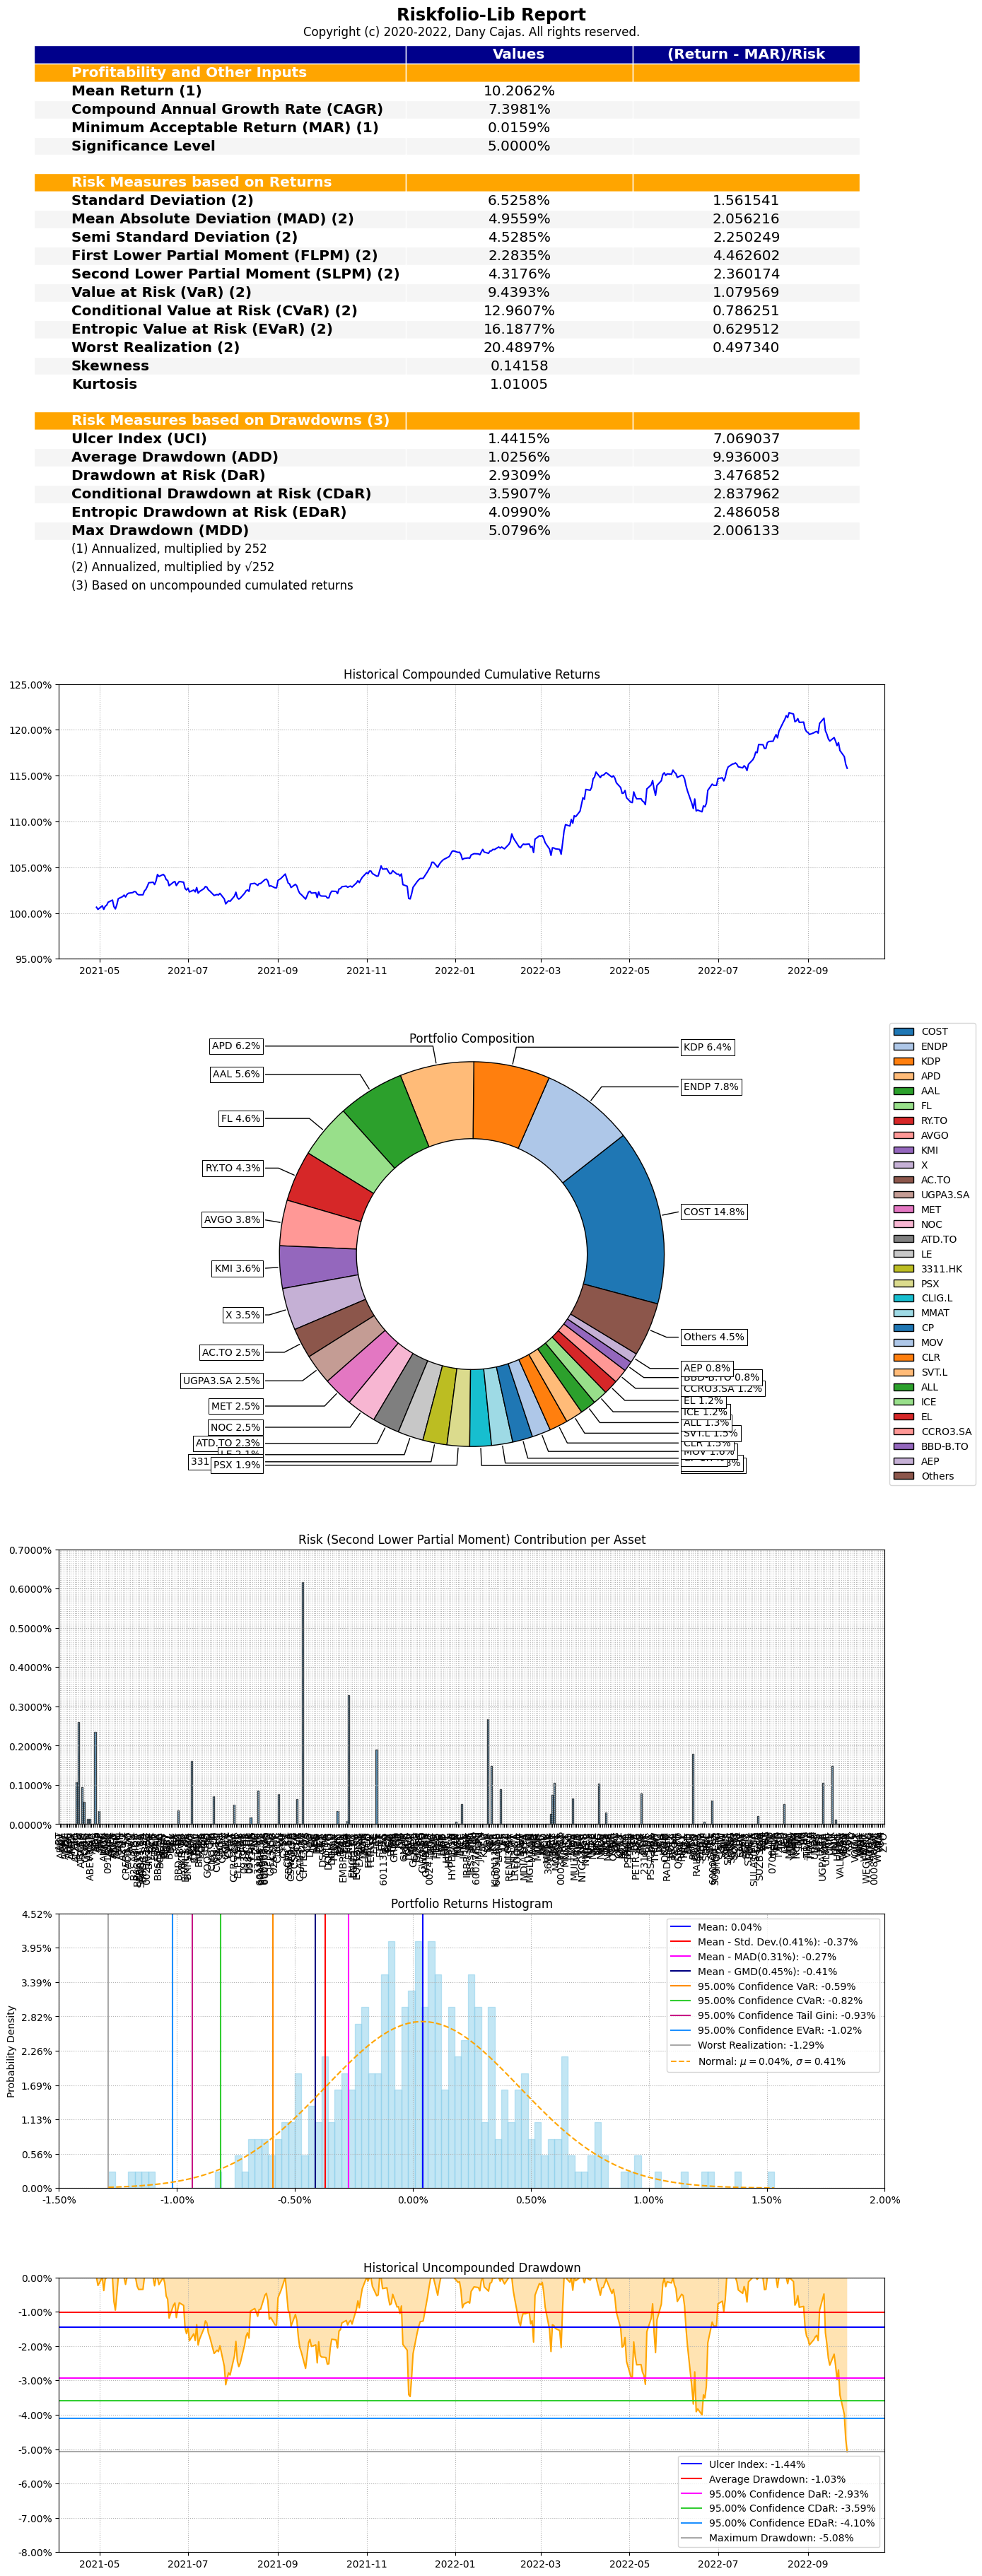

In [9]:
rp.Reports.excel_report(returns, allocations, rf=risk_free_rate, alpha=0.05, t_factor=252, ini_days=1, days_per_year=252, name='permitted_exclude_india_5y_report')
rp.Reports.jupyter_report(returns, allocations, rm=risk_measure, rf=risk_free_rate, alpha=0.05, others=0.05, nrow=len(port.assetslist), height=6, width=14, t_factor=252, ini_days=1, days_per_year=252, bins=100)